# Module 2: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Mathematically derive the values of $\hat{\beta}_0$ and $\hat{\beta}_1$
2. Enhance our skills with linear regression modeling.
3. Learn the uses and limitations of RSS, ESS, TSS and $R^2$.
4. Analyze and interpret nonidentifiability.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [34]:
# Load Required Packages
library(RCurl) #a package that includes the function getURL(), which allows for reading data from github.
library(tidyverse)

## Problem 1: Maximum Likelihood Estimates (MLEs)

Consider the simple linear regression model $Y_i = \beta_0 + \beta_1x_i + \varepsilon_i$ for $i = 1,...,n$, $\,\,\,\varepsilon_i \sim N(0,\sigma^2)$. In the videos, we showed that the least squares estimator in matrix-vector form is $\mathbf{\widehat{\beta}} = (\beta_0, \beta_1)^T = (X^TX)^{-1}X^T\mathbf{Y}$. In this problem, you will derive the least squares estimators for simple linear regression without (explicitly) using linear algebra.

Least squares requires that we minimize $$f(\mathbf{x}; \beta_0, \beta_1) = \sum^n_{i=1}\bigg(Y_i - [\beta_0 + \beta_1x_i] \bigg)^2$$ over $\beta_0$ and $\beta_1$. 

#### 1. (a) Taking Derivatives

Find the partial derivative of $f(\mathbf{x}; \beta_0, \beta_1)$ with respect to $\beta_0$, and the partial derivative of $f(\mathbf{x}; \beta_0, \beta_1)$ with respect to $\beta_1$. Recall that the partial derivative with respect to $x$ of a multivariate function $h(x,y)$ is calculated by taking the derivative  of $h$ with respect to $x$ while treating $y$ constant.

$\frac{\partial{f}}{\partial{\beta_0}} = -2\sum^{n}_{i=1}(\mathbf{Y_i}-\beta_0-\beta_1x_i)$ and 
$\frac{\partial{f}}{\partial{\beta_1}} = -2\sum^{n}_{i=1}(\mathbf{Y_i}-\beta_0-\beta_1x_i)$

#### 1. (b) Solving for $\hat{\beta}_0$ and $\hat{\beta}_1$

Use **1. (a)** to find the minimizers,  $\widehat{\beta}_0$ and $\widehat{\beta}_1$, of $f$. That is, set each partial derivative to zero and solve for $\beta_0$ and $\beta_1$. In particular, show

$$
\widehat{\beta}_1 = \frac{\sum^n_{i=1}(x_i - \bar{x})(Y_i -\bar{Y})}{\sum^n_{i=1}(x_i - \bar{x})^2} 
\qquad \text{ and } \qquad
\widehat{\beta}_0 = \bar{Y} - \widehat{\beta}_1\bar{x}
$$

Solving $\frac{\partial{f}}{\partial{\beta_0}} = -2\sum^{n}_{i=1}(\mathbf{Y_i}-\beta_0-\beta_1x_i) = 0$ for $\beta_0$ results in $n\beta_0 + \beta_1\sum^{n}_{i=1}x_i = \sum^{n}_{i=1}\mathbf{Y_i}$. Solving $\frac{\partial{f}}{\partial{\beta_1}} = -2\sum^{n}_{i=1}(\mathbf{Y_i}-\beta_0-\beta_1x_i) = 0$ for $\beta_1$ results in $\beta_0\sum^{n}_{i=1}x_i + \beta_1\sum^{n}_{i=1}x_i^2 = \sum^{n}_{i=1}x_i\mathbf{Y_i}$. Solving these equations in parallel as a system of equations results in the desired estimators above.


## Problem 2: Oh My Goodness of Fit!

In the US, public schools have been slowly increasing class sizes over the last 15 years [https://stats.oecd.org/Index.aspx?DataSetCode=EDU_CLASS]. The general cause for this is because it saves money to have more kids per teacher. But how much money does it save? Let's use some of our new regression skills to try and figure this out. Below is an explanation of the variables in the dataset.

Variables/Columns:  
School  
Per-Pupil Cost  (Dollars)   
Average daily Attendance   
Average Monthly Teacher Salary (Dollars)  
Percent Attendance       
Pupil/Teacher ratio   

Data Source: E.R. Enlow (1938). "Do Small Schools Mean Large Costs?," Peabody Journal of Educaltion, Vol. 16, \#1, pp. 1-11

In [35]:
school.data = read_table("school.dat")
names(school.data) = c("school", "cost", "avg.attendance", "avg.salary", "pct.attendance", "pup.tch.ratio")
head(school.data)
dim(school.data)

Parsed with column specification:
cols(
  Adair = col_character(),
  `66.90` = col_double(),
  `451.4` = col_double(),
  `160.22` = col_double(),
  `90.77` = col_double(),
  `33.8` = col_double()
)



school,cost,avg.attendance,avg.salary,pct.attendance,pup.tch.ratio
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Calhoun,108.57,219.1,161.79,89.86,23.0
Capitol View,70.00,268.9,136.37,92.44,29.4
Connally,49.04,161.7,106.86,92.01,29.4
Couch,71.51,422.1,147.17,91.60,29.2
Crew,61.08,440.6,146.24,89.32,36.3
Davis,105.21,139.4,159.79,86.51,22.6


[1] 43  6

#### 2. (a) Create a model

Begin by creating two figures for your model. The first with `pup.tch.ratio` on the x-axis and `cost` on the y-axis. The second with `avg.salary` on the x-axis and `cost` on the y-axis. Does there appear to be a relation between these two predictors and the response.

Then fit a multiple linear regression model with `cost` as the response and `pup.tch.ratio` and `avg.salary` as predictors.


Call:
lm(formula = cost ~ pup.tch.ratio + avg.salary, data = school.data)

Coefficients:
  (Intercept)  pup.tch.ratio     avg.salary  
     120.2376        -2.8259         0.2406  


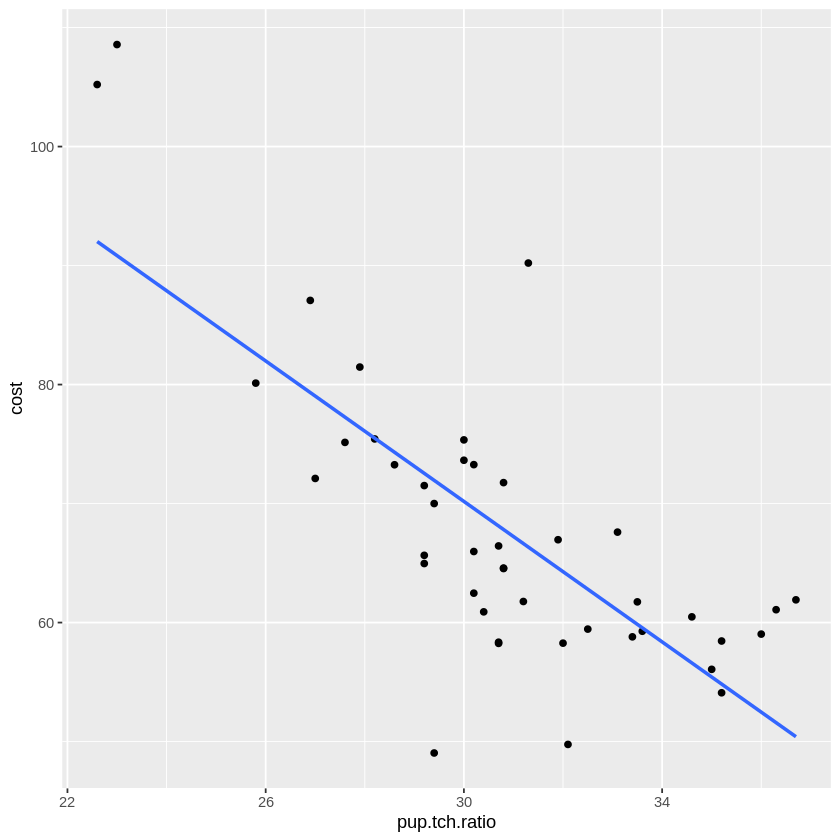

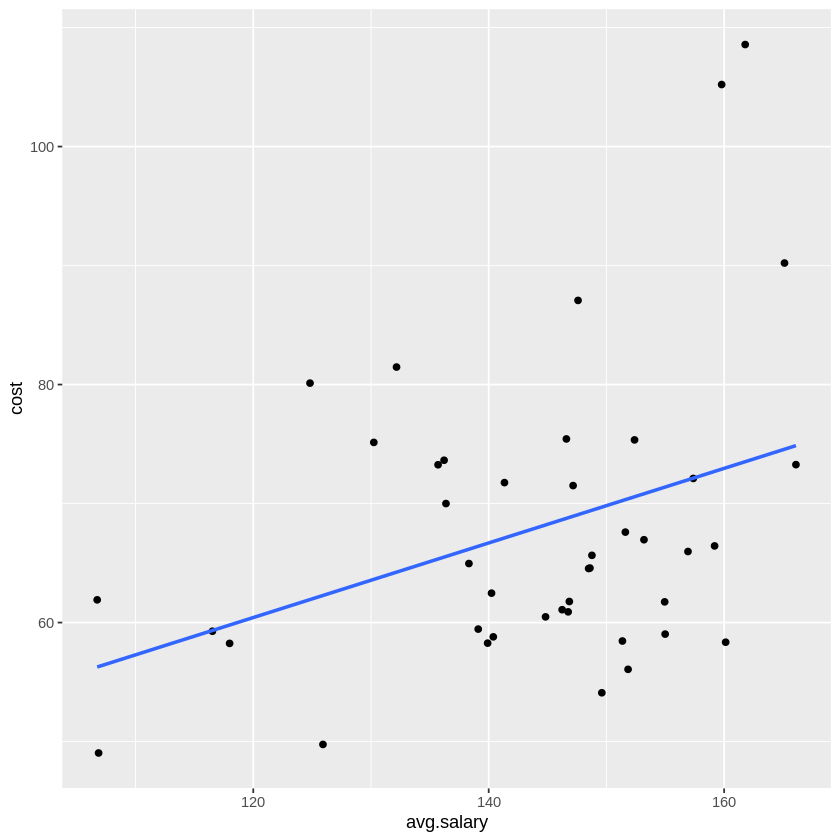

In [36]:
# Your Code Here
g1 = ggplot(school.data, aes(x=pup.tch.ratio,y=cost)) + geom_point() + geom_smooth(method="lm",formula=y~x,se=FALSE)
g2 = ggplot(school.data, aes(x=avg.salary,y=cost)) + geom_point() + geom_smooth(method="lm",formula=y~x,se=FALSE)

mlr_school = lm(cost ~ pup.tch.ratio + avg.salary, school.data)

mlr_school
g1
g2


#### 2. (b) RSS, ESS and TSS

In the code block below, manually calculate the RSS, ESS and TSS for your MLR model. Print the results.

In [63]:
# Your Code Here


y = school.data$cost
yhat = coef(mlr_school)["(Intercept)"] + 
    coef(mlr_school)["pup.tch.ratio"]*school.data$pup.tch.ratio + 
    coef(mlr_school)["avg.salary"]*school.data$avg.salary

RSS = sum((y - yhat)^2)
ESS = sum((yhat-mean(y))^2)
TSS = sum((y-mean(y))^2)

sprintf("RSS = %s", RSS)
sprintf("ESS = %s", ESS)
sprintf("TSS = %s", TSS)

[1] "RSS = 2384.59693812851"

[1] "ESS = 4188.56832698776"

[1] "TSS = 6573.16526511628"

#### 2. (c) Are you Squared?

Using the values from **2.b**, calculate the $R^2$ value for your model. Check your results with those produced from the `summary()` statement of your model.

In words, describe what this value means for your model.

In [64]:
# Your Code Here

Rsquared = 1 - RSS/TSS
sprintf("my R^2 = %s", Rsquared)

summary(mlr_school)

[1] "my R^2 = 0.637222427559589"


Call:
lm(formula = cost ~ pup.tch.ratio + avg.salary, data = school.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8290  -5.2752  -0.8332   3.8253  19.6986 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   120.23756   17.73230   6.781 3.79e-08 ***
pup.tch.ratio  -2.82585    0.37714  -7.493 3.90e-09 ***
avg.salary      0.24061    0.08396   2.866   0.0066 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.721 on 40 degrees of freedom
Multiple R-squared:  0.6372,	Adjusted R-squared:  0.6191 
F-statistic: 35.13 on 2 and 40 DF,  p-value: 1.559e-09


My calculations yielded $R^2 = 0.6372$, which is the same as the $R^2$ from the model summary statment. This means that about 62% of the response is explained by the predictors.

#### 2. (d) Conclusions

Describe at least two advantages and two disadvantages of the $R^2$ value.

$R^2$ is disadvantages when making causal claims about data and needs to be adjusted for the number of predictors in the data. 2 advantages of this number is that it determines the proportion of variance in the response variable that is explained by the predictor variables, and it shows association between the variables.

# Problem 3: Identifiability

**This problem might require some outside-of-class research if you haven't taken a linear algebra/matrix methods course.**

Matrices and vectors play an important role in linear regression. Let's review some matrix theory as it might relate to linear regression.

Consider the system of linear equations 

\begin{equation} 
Y_i = \beta_0 + \sum^p_{j=1}\beta_j x_{i,j} + \varepsilon_i,
\end{equation}
for $i = 1,...,n$, where $n$ is the number of data points (measurements in the sample), and $j = 1,...,p$, where 

1. $p+1$ is the number of parameters in the model. 
2. $Y_i$ is the $i^{th}$ measurement of the *response variable*.
3. $x_{i,j}$ is the $i^{th}$ measurement of the $j^{th}$ *predictor variable*.
4. $\varepsilon_i$ is the $i^{th}$ *error term* and is a random variable, often assumed to be $N(0, \sigma^2)$. 
5. $\beta_j$, $j = 0,...,p$ are *unknown parameters* of the model. We hope to estimate these, which would help us characterize the relationship between the predictors and response.

#### 3. (a) MLR Matrix Form

Write the equation above in matrix vector form. Call the matrix including the predictors $X$, the vector of $Y_i$s $\mathbf{Y}$, the vector of parameters $\mathbf{\beta}$, and the vector of error terms $\mathbf{\varepsilon}$. (This is more LaTeX practice than anything else...)**

The MLR above has the form $\mathbf{y}=\mathbf{X}\mathbf{\beta}+\mathbf{\epsilon}$

#### 3. (b) Properties of this matrix

In lecture, we will find that the OLS estimator for $\mathbf{\beta}$ in MLR is $\widehat{\boldsymbol\beta} = (X^TX)^{-1}X^T\mathbf{Y}$. Use this knowledge to answer the following questions:


1. What condition must be true about the columns of $X$ for the "Gram" matrix $X^TX$ to be invertible? 

2. What does this condition mean in practical terms, i.e., does $X$ contain a deficiency or redundancy?

3. Suppose that the number of measurements ($n$) is less than the number of model parameters ($p+1$). What does this say about the invertibility of $X^TX$? What does this mean on a practical level?

4. What is true about about $\widehat{\boldsymbol\beta}$ if $X^TX$ is not invertible?

1. The columns of the matrix X must be linearly independent for the "Gram" matrix $X^TX$ to be invertible. The predictors should not be collinear.
2. This condition means that the matrix X contains redundancy since the predictor variables are closely associated. This makes estimating unique coeffecients impossible in some instances.
3. The matrix $X^TX$ is not invertible if $n<p+1$ (the number of measurements is less than the number of model parameters). On a practical level, this means that there fewer data than required to estimate parameters and the model will be overfitted.
4. $\hat{\beta}$ does not have a unique solution if $X^TX$ is not invertible. 

## Problem 4: Downloading...

The following [data](https://dasl.datadescription.com/datafile/downloading/) were collected to see if time of day madea difference on file download speed. A researcher placed a file on a remote server and then proceeded to download it at three different time periods of the day. They downloaded the file 48 times in all, 16 times at each Time of Day (`time`), and recorded the Time in seconds (`speed`) that the download took.

#### 4. (a) Initial Observations

The `downloading` data is loaded in and cleaned for you. Using `ggplot`, create a boxplot of `speed` vs. `time`. Make some basic observations about the three categories.

In [92]:
# Load in the data and format it
downloading = read.csv("downloading.txt", sep="\t")
names(downloading) = c("time", "speed")
# Change the types of brand and form to categories, instead of real numbers
downloading$time = as.factor(downloading$time)
summary(downloading)

                 time        speed      
 Early (7AM)       :16   Min.   : 68.0  
 Evening (5 PM)    :16   1st Qu.:129.8  
 Late Night (12 AM):16   Median :198.0  
                         Mean   :193.2  
                         3rd Qu.:253.0  
                         Max.   :367.0  

In [93]:
summary(lm(speed ~ time, data = downloading))


Call:
lm(formula = speed ~ time, data = downloading)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.312 -34.328  -5.187  26.250 103.625 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              113.37      11.79   9.619 1.73e-12 ***
timeEvening (5 PM)       159.94      16.67   9.595 1.87e-12 ***
timeLate Night (12 AM)    79.69      16.67   4.781 1.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.15 on 45 degrees of freedom
Multiple R-squared:  0.6717,	Adjusted R-squared:  0.6571 
F-statistic: 46.03 on 2 and 45 DF,  p-value: 1.306e-11


The median speed is 198 seconds with the max speed being 367 second and the min speed being 68 seconds. The $R^2$ tells us that about 65% of the variation in the response is explainable by the predictors. The smallest slope belongs to the late night downloads.

#### 4. (b) How would we model this?

Fit a regression to these data that uses `speed` as the response and `time` as the predictor. Print the summary. Notice that the result is actually *multiple* linear regression, not simple linear regression. The model being used here is:

\begin{align*}
Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \varepsilon_i
\end{align*}

where 

1. $X_{i,1} = 1$ if the $i^{th}$ download is made in the evening (5 pm).
2.  $X_{i,2} = 1$ if the $i^{th}$ download is made at night (12 am).

Note: If $X_{i,1} = 0$ and $X_{i,2} = 0$, then the $i^{th}$ download is made in the morning (7am).

**To confirm this is the model being used, write out the explicit equation for your model - using the parameter estimates from part (a) - and print out it's design matrix.**

In [103]:
# Your Code Here
downloading
#X = matrix(downloading$speed,nrow=16,ncol=3)




mlr_downld = lm(speed ~ time, downloading)
summary(mlr_downld)

beta = coef(mlr_downld)
X = model.matrix(mlr_downld)
print("The design matrix:")
print(X)

#y = beta[0]*X[0] + beta[1]*X[1] + beta[2]*X[2] + mlr_downld$residuals

time,speed
<fct>,<int>
Early (7AM),68
Early (7AM),138
Early (7AM),75
Early (7AM),186
Early (7AM),68
Early (7AM),217
Early (7AM),93
Early (7AM),90
Early (7AM),71



Call:
lm(formula = speed ~ time, data = downloading)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.312 -34.328  -5.187  26.250 103.625 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              113.37      11.79   9.619 1.73e-12 ***
timeEvening (5 PM)       159.94      16.67   9.595 1.87e-12 ***
timeLate Night (12 AM)    79.69      16.67   4.781 1.90e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.15 on 45 degrees of freedom
Multiple R-squared:  0.6717,	Adjusted R-squared:  0.6571 
F-statistic: 46.03 on 2 and 45 DF,  p-value: 1.306e-11


[1] "The design matrix:"
   (Intercept) timeEvening (5 PM) timeLate Night (12 AM)
1            1                  0                      0
2            1                  0                      0
3            1                  0                      0
4            1                  0                      0
5            1                  0                      0
6            1                  0                      0
7            1                  0                      0
8            1                  0                      0
9            1                  0                      0
10           1                  0                      0
11           1                  0                      0
12           1                  0                      0
13           1                  0                      0
14           1                  0                      0
15           1                  0                      0
16           1                  0                      0
17    

Above, the design matrix is printed and the equation is confirmed using the estimates from the model mlr_downld.

#### 4. (c) Only two predictors?

We have three categories, but only two predictors. Why is this the case? To address this question, let's consider the following model:

$$ Y_i = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \beta_2 X_{i,3} + \varepsilon_i $$

where 

1. $X_{i,1} = 1$ if the $i^{th}$ download is made in the evening (5 pm).
2. $X_{i,2} = 1$ if the $i^{th}$ download is made at night (12 am).
3. $X_{i,3} = 1$ if the $i^{th}$ download is made in the morning (7 am).

**Construct a design matrix to fit this model to the response, `speed`. Determine if something is wrong with it. Hint: Analyze the design matrix.**

In [128]:
# Your Code Here
X = matrix(downloading$speed,nrow=16,ncol=3)
colnames(X) = c("Early", "Evening", "Late")
X


Early,Evening,Late
68,299,216
138,367,175
75,331,274
186,257,171
68,260,187
217,269,213
93,252,221
90,200,139
71,296,226
154,204,128


The design matrix shows multicolinearity between the predictors. The predictors are all linearly associated and so the design matrix has too few predictors for the parameters.


#### 4. (d) Interpretation

Interpret the coefficients in the model from **4.b**. In particular:

1. What is the difference between the mean download speed at 7am and the mean download speed at 5pm?
2. What is the mean download speed (in seconds) in the morning?
3. What is the mean download speed (in seconds) in the evening?
4. What is the mean download speed (in seconds) at night?

1. $\bar{x}_{7am} - \bar{x}_{5pm} = -159.9375$
2. $\bar{x}_{7am} = 113.375$
3. $\bar{x}_{5am} = 273.3125$
4. $\bar{x}_{12am} = 193.0625$